In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
from plotly import subplots
import plotly.express as px
import plotly.io as pio

from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

from datetime import date, datetime, timedelta
import time, re, os

import numpy as np
from math import atan2
from numpy import cos, sin, conjugate, sqrt
import pandas as pd
from scipy.interpolate import Rbf
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from math import sqrt
from matplotlib import cm
from scipy.stats.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

os.listdir()

['.ipynb_checkpoints', 'Social_Network_Ads.csv', 'Social_Netwrok_Ads.ipynb']

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [3]:
df['User ID']=df['User ID'].astype(int)
df['Purchased']=df['Purchased'].astype(int)
df['Gender']=df['Gender'].map(dict(Male=0, Female=1))
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    for name in summary['Name']:
        summary.loc[summary['Name'] == name, 'Mean'] = round(np.mean(df[name]), 2)
        summary.loc[summary['Name'] == name, 'Sigma'] = round(np.std(df[name]), 2)  


    return summary
resumetable(df)

Dataset Shape: (400, 5)


,Name,dtypes,Missing,Uniques,Mean,Sigma
0,User ID,int32,0,400,15691539.76,71568.69
1,Gender,int64,0,2,0.51,0.50
2,Age,int64,0,43,37.66,10.47
3,EstimatedSalary,int64,0,117,69742.50,34054.31
4,Purchased,int32,0,2,0.36,0.48


In [4]:
df['Gender'].value_counts()

1    204
0    196
Name: Gender, dtype: int64

In [5]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [6]:
df['User ID']=df['User ID'].astype(object)
df['Purchased']=df['Purchased'].astype(str)
templatep="none"


fig = px.scatter_matrix(df[['Age','EstimatedSalary','Purchased']], color='Purchased', template=templatep)
fig.show()

In [7]:
fig = px.scatter_matrix(df[['Age','EstimatedSalary','Gender', 'Purchased']], color='Gender', template=templatep)
fig.show()

In [8]:
# df['Gender']=df['Gender'].map(dict(Male=0, Female=1))
templatep='none'
fig=go.Figure()
fig.add_trace(go.Box(
y=df['Age']/(np.max(df['Age'])), x=df['Purchased'], 
    boxmean='sd', name='Age'))
fig.add_trace(go.Box(
y=df['EstimatedSalary']/(np.max(df['EstimatedSalary'])), x=df['Purchased'], 
    boxmean='sd', name='EstimatedSalary'))



fig.update_traces(orientation='v')
fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey')

fig.update_layout(title_text='Box plot of Purchased', 
                 yaxis_title='Normalized', xaxis_title='Purchased',
                 boxmode='group', template=templatep)
fig.show()

In [9]:
maskM=df['Purchased']==str(0)
maskF=df['Purchased']==str(1)
df['ZscoreAge']=(df['Age']-np.mean(df['Age']))/np.std(df['Age'])
df['ZscoreEstimatedSalary']=(df['EstimatedSalary']-np.mean(df['EstimatedSalary']))/np.std(df['EstimatedSalary'])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,ZscoreAge,ZscoreEstimatedSalary
0,15624510,0,19,19000,0,-1.781797,-1.490046
1,15810944,0,35,20000,0,-0.253587,-1.460681
2,15668575,1,26,43000,0,-1.113206,-0.785290
3,15603246,1,27,57000,0,-1.017692,-0.374182
4,15804002,0,19,76000,0,-1.781797,0.183751


In [10]:
df.describe()

,Gender,Age,EstimatedSalary,ZscoreAge,ZscoreEstimatedSalary
count,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02
mean,0.510000,37.655000,69742.500000,-3.441691e-17,-1.193490e-17
std,0.500526,10.482877,34096.960282,1.001252e+00,1.001252e+00
min,0.000000,18.000000,15000.000000,-1.877311e+00,-1.607506e+00
25%,0.000000,29.750000,43000.000000,-7.550313e-01,-7.852897e-01
50%,1.000000,37.000000,70000.000000,-6.256110e-02,7.561451e-03
75%,1.000000,46.000000,88000.000000,7.970571e-01,5.361289e-01
max,1.000000,60.000000,150000.000000,2.134241e+00,2.356750e+00


Z-scores of Age and Estimated salary is less than 3, indicating that there are no outlier, further checks can be done with a transform and cheking Z-score again

In [11]:
templatep="none"

fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=('Estimated Salary', 'Age', 'Z-scoreEstimatedSalary', 'Z-scoreAge'))
TraceAge=go.Histogram(x=df['Age'], name='Age')
TraceEstimatedSalaryP0=go.Histogram(x=df[maskM]['EstimatedSalary'], name='Not Purchased', marker={'color':'#2BCDC1'},
                                    opacity=0.7, legendgroup="group",
                                   xbins=dict(size=(np.max(df[maskM]['EstimatedSalary'])-
                                                      np.min(df[maskM]['EstimatedSalary']))/10), showlegend=False)
TraceEstimatedSalaryP1=go.Histogram(x=df[maskF]['EstimatedSalary'],
                                   marker={'color':'#F66095'}, opacity=0.7,name='Purchased', legendgroup="group2", showlegend=False,
                                   xbins=dict(size=(np.max(df[maskM]['EstimatedSalary'])-
                                                      np.min(df[maskM]['EstimatedSalary']))/10))

TraceZEstimatedSalaryP0=go.Histogram(x=df[maskM]['ZscoreEstimatedSalary'], name='Not Purchased', marker={'color':'#2BCDC1'},
                                    opacity=0.7, legendgroup="group", showlegend=False,
                                     xbins=dict(size=(np.max(df[maskM]['ZscoreEstimatedSalary'])-
                                                      np.min(df[maskM]['ZscoreEstimatedSalary']))/10)
                                   )
TraceZEstimatedSalaryP1=go.Histogram(x=df[maskF]['ZscoreEstimatedSalary'], name='Purchased',legendgroup="group2",showlegend=False,
                                   marker={'color':'#F66095'}, opacity=0.7
                                   )





TraceAgeP0=go.Histogram(x=df[maskM]['Age'], name='Not Purchased', marker={'color':'#2BCDC1'}, opacity=0.7, legendgroup="group",
                       showlegend=False,
                        xbins=dict(size=(np.max(df[maskM]['Age'])-np.min(df[maskM]['Age']))/10))
TraceAgeP1=go.Histogram(x=df[maskF]['Age'], name='Purchased',legendgroup="group2",showlegend=False,
                       marker={'color':'#F66095'}, opacity=0.7,
                       xbins=dict(size=(np.max(df[maskM]['Age'])-np.min(df[maskM]['Age']))/10))

TraceZAgeP0=go.Histogram(x=df[maskM]['ZscoreAge'], name='Not Purchased', marker={'color':'#2BCDC1'}, opacity=0.7, legendgroup="group",
                       showlegend=True,
                        xbins=dict(size=(np.max(df[maskM]['ZscoreAge'])-
                                                      np.min(df[maskM]['ZscoreAge']))/10))
TraceZAgeP1=go.Histogram(x=df[maskF]['ZscoreAge'], name='Purchased',legendgroup="group2",showlegend=True,
                       marker={'color':'#F66095'}, opacity=0.7,
                       xbins=dict(size=(np.max(df[maskM]['ZscoreAge'])-np.min(df[maskM]['ZscoreAge']))/10))
fig.append_trace(TraceEstimatedSalaryP0, 1, 1)
fig.append_trace(TraceEstimatedSalaryP1, 1,1)
fig.append_trace(TraceZEstimatedSalaryP0, 2, 1)
fig.append_trace(TraceZEstimatedSalaryP1, 2,1)
fig.append_trace(TraceAgeP0, 1, 2)
fig.append_trace(TraceAgeP1, 1,2)

fig.append_trace(TraceZAgeP0, 2,2)
fig.append_trace(TraceZAgeP1, 2,2)
fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(barmode='stack', yaxis_title='counts', title_text='Distribution of Purchased', showlegend=True, template=templatep
                                   )
fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey')

fig.show()

In [12]:
fig=px.density_contour(df, x='Age', y='EstimatedSalary',
                       range_x=[np.min(df['Age']),np.max(df['Age'])], 
                         range_y = [np.min(df['EstimatedSalary']), np.max(df['EstimatedSalary'])],animation_frame='Purchased')
fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey')
fig.data[0]["contours"].coloring = "fill"
fig.update_traces(colorscale="algae")

for num,frames in enumerate(fig.frames, start=0):
    fig.frames[num].data[0]["contours"].coloring = "fill"
fig.show()

In [13]:
# mask1=(abs(df['ZscoreEstimatedSalary']<=1.95))
# mask2=(abs(df['ZscoreAge']<=1.95))

# df=df[mask1]
# df=df[mask2]
correlation_df=df.drop(labels=['ZscoreEstimatedSalary', 'ZscoreAge', 'User ID'], axis=1)


In [14]:

correlation_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [15]:
correlation_df['Purchased']=df['Purchased'].astype(int)
correlation=correlation_df.corr(method='pearson')
correlation

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


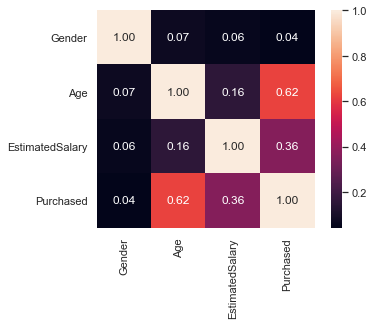

In [16]:

sns.set(font_scale=1.0)
heatmap=sns.heatmap(correlation, cbar=True, annot=True, square=True, fmt='0.2f',
                   yticklabels=correlation.columns.values, xticklabels=correlation.columns.values)

In [48]:
Xvariable=['Age', 'EstimatedSalary']
yvariable=['Purchased']
X=correlation_df[Xvariable].values
y=correlation_df[yvariable].values
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1, test_size=0.3)

In [49]:
#scaler=preprocessing.StandardScaler()
scaler=preprocessing.QuantileTransformer()


X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [50]:

pipelines = []
pipelines.append(('ScaledKNN', Pipeline([('Scaler', scaler),('KNN',KNeighborsClassifier())])))
pipelines.append(('Scaledsvc', Pipeline([('Scaler', scaler),('svc', SVC(gamma='auto'))])))
pipelines.append(('ScaledGPC', Pipeline([('Scaler', scaler),('GPC', GaussianProcessClassifier())])))
pipelines.append(('ScaledDTC', Pipeline([('Scaler', scaler),('DTC', DecisionTreeClassifier())])))
pipelines.append(('ScaledMLP', Pipeline([('Scaler', scaler),('MLP', MLPClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', scaler),('RF', RandomForestClassifier())])))
pipelines.append(('ScaledABC', Pipeline([('Scaler', scaler),('AB', AdaBoostClassifier())])))

In [51]:


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = (name, round(cv_results.mean(),  3), round(cv_results.std(), 3))
    print(msg)

('ScaledKNN', 0.918, 0.04)
('Scaledsvc', 0.882, 0.033)
('ScaledGPC', 0.825, 0.053)
('ScaledDTC', 0.864, 0.024)
('ScaledMLP', 0.807, 0.041)
('ScaledRF', 0.914, 0.035)
('ScaledABC', 0.9, 0.033)


In [52]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_model = SVC(random_state=0).fit(X_train_scaled,y_train)
print("train score - " + str(svc_model.score(X_train_scaled, y_train)))
print("test score - " + str(svc_model.score(X_test_scaled, y_test)))


train score - 0.9428571428571428
test score - 0.875


In [53]:
print(svc_model)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


In [54]:
#We can use a grid search to find the best parameters for this model. Lets try

#Define a list of parameters for the models
params = {'C': np.array(range(1, 100, 1)),
               'gamma': np.array(range(1, 100, 1))/10}

#We can build Grid Search model using the above parameters. 
#cv=5 means cross validation with 5 folds
grid_search = GridSearchCV(SVC(random_state=0), params, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


print("train score - " + str(grid_search.score(X_train_scaled, y_train)))
print("test score - " + str(grid_search.score(X_test_scaled, y_test)))
print(grid_search.best_params_)

train score - 0.9428571428571428
test score - 0.8666666666666667
{'C': 2, 'gamma': 4.8}


In [58]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_model = SVC(random_state=0, C=2, gamma=4.8).fit(X_train_scaled,y_train)
print(f"train score - {round(svc_model.score(X_train_scaled, y_train), 3)}")
print(f"test score - {round(svc_model.score(X_test_scaled, y_test), 3)}")
print(svc_model)

train score - 0.943
test score - 0.867
SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=4.8, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


               precision    recall  f1-score   support

Not Purchased       0.94      0.83      0.88        72
    Purchased       0.79      0.92      0.85        48

     accuracy                           0.87       120
    macro avg       0.86      0.88      0.86       120
 weighted avg       0.88      0.87      0.87       120



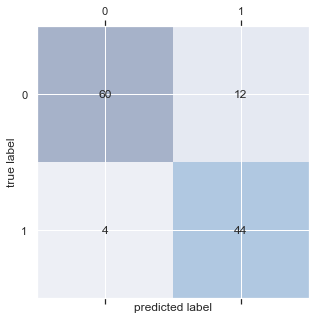

In [59]:

y_pred=svc_model.predict(X_test_scaled)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Not Purchased", "Purchased"]))

In [60]:
df['Purchased'].value_counts()*0.3

0    77.1
1    42.9
Name: Purchased, dtype: float64

In [61]:
(257+143)*0.3, 60+44+4+12



(120.0, 120)